In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from scipy.signal import detrend

In [2]:
head = ['LAT', 'LONG', 'H', 'F']
total = pd.read_excel('TOTAL.xls', header= None, names=head)
total.LAT = total.LAT/1000
total.LONG = total.LONG/1000
teste = pd.read_excel('Teste.xls', header=0)


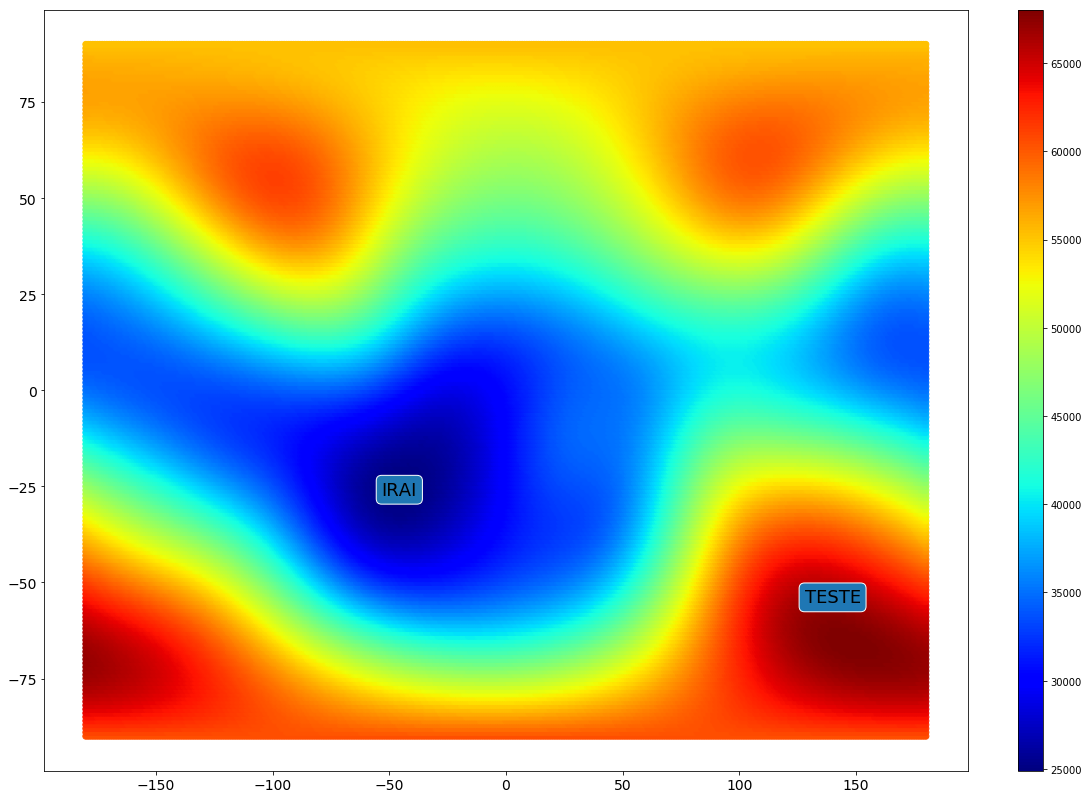

In [3]:
plt.figure(figsize=(18,14), facecolor='w')
bbox_props = dict(boxstyle="round,pad=0.3", ec="w", lw=1)

ax1 = plt.scatter(total.LONG, total.LAT, c= total.F, cmap='jet')
cbar = plt.colorbar(ax1, aspect=30, fraction = 0.03, orientation="vertical")
plt.annotate('IRAI' , xy=(-53.23,-27.18) , bbox=bbox_props, fontsize = 18)
plt.annotate('TESTE' , xy=(128.00,-55.18) , bbox=bbox_props, fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

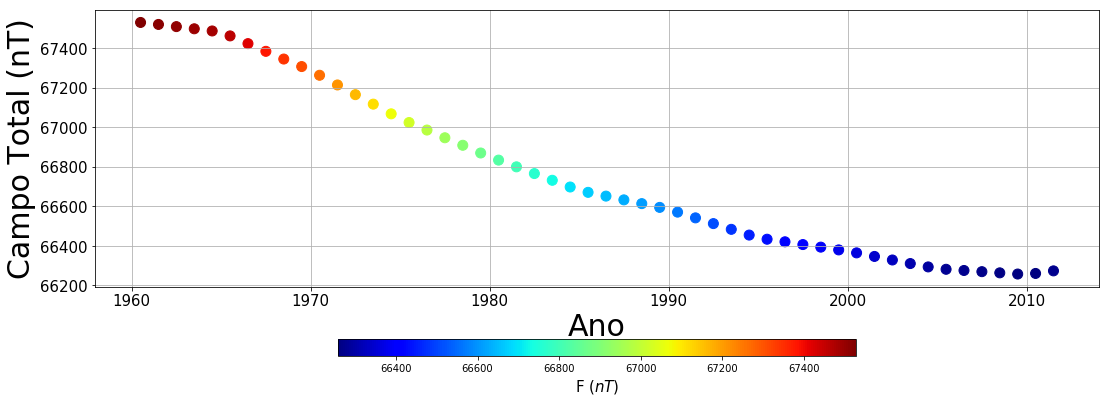

In [4]:
plt.figure(figsize=(18,14), facecolor='w')
plt.subplot(212)
p2 = plt.scatter(teste.DATE, teste.F, c=teste.F,cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

In [5]:
dobs = np.array(teste.F)
G1 = np.array(teste.DATE)
G2 = np.zeros(len(teste.DATE))
for i in range(len(G2)):
    G2[i] = 1.0
G = np.c_[G1,G2]
param1 = np.linalg.inv(np.dot(G.T,G))
param2 = np.dot(G.T,dobs)
param = np.dot(param1,param2)
y = np.dot(G,param)

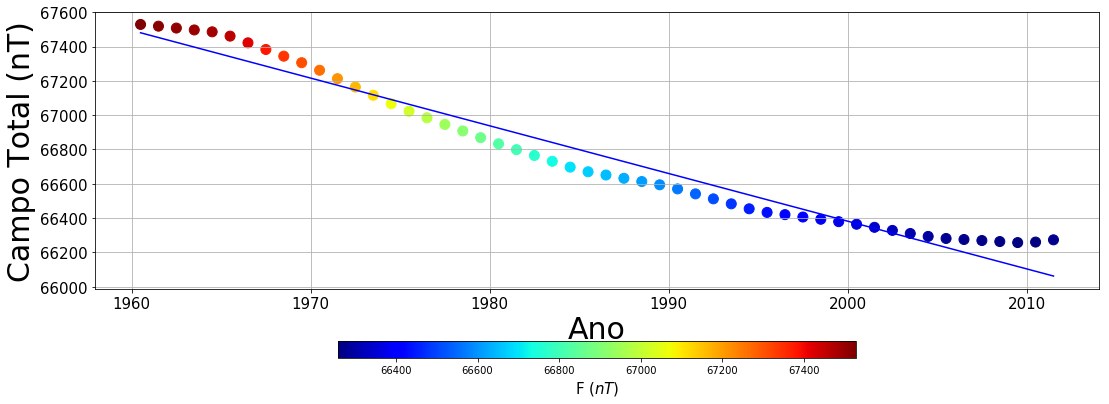

In [6]:
plt.figure(figsize=(18,14), facecolor='w')
plt.subplot(212)
p2 = plt.scatter(teste.DATE, teste.F, c=teste.F,cmap='jet',s = 100)
plt.plot(teste.DATE,y,'blue')
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.show()

In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
from Modules.Sama_Irai import calang,caldist
from scipy import std
from scipy.stats.stats import pearsonr

In [8]:
# Criacao dos dataframes aqui:
data = pd.read_csv('IGRF/Campo_Total',delim_whitespace= True,usecols=[0,13])

SP1 = pd.read_excel('SP.xls')

SPN = pd.read_excel('SPN.xls')

irai = pd.read_excel('Irai(RS).xls',sheet_name=2,skiprows=4,usecols=[0,19])
irai['Lat'] = -27.18
irai['Long'] = -53.23
header = ['Ano', 'Long','Lat','F']
sama = pd.read_excel('Sama.xls')

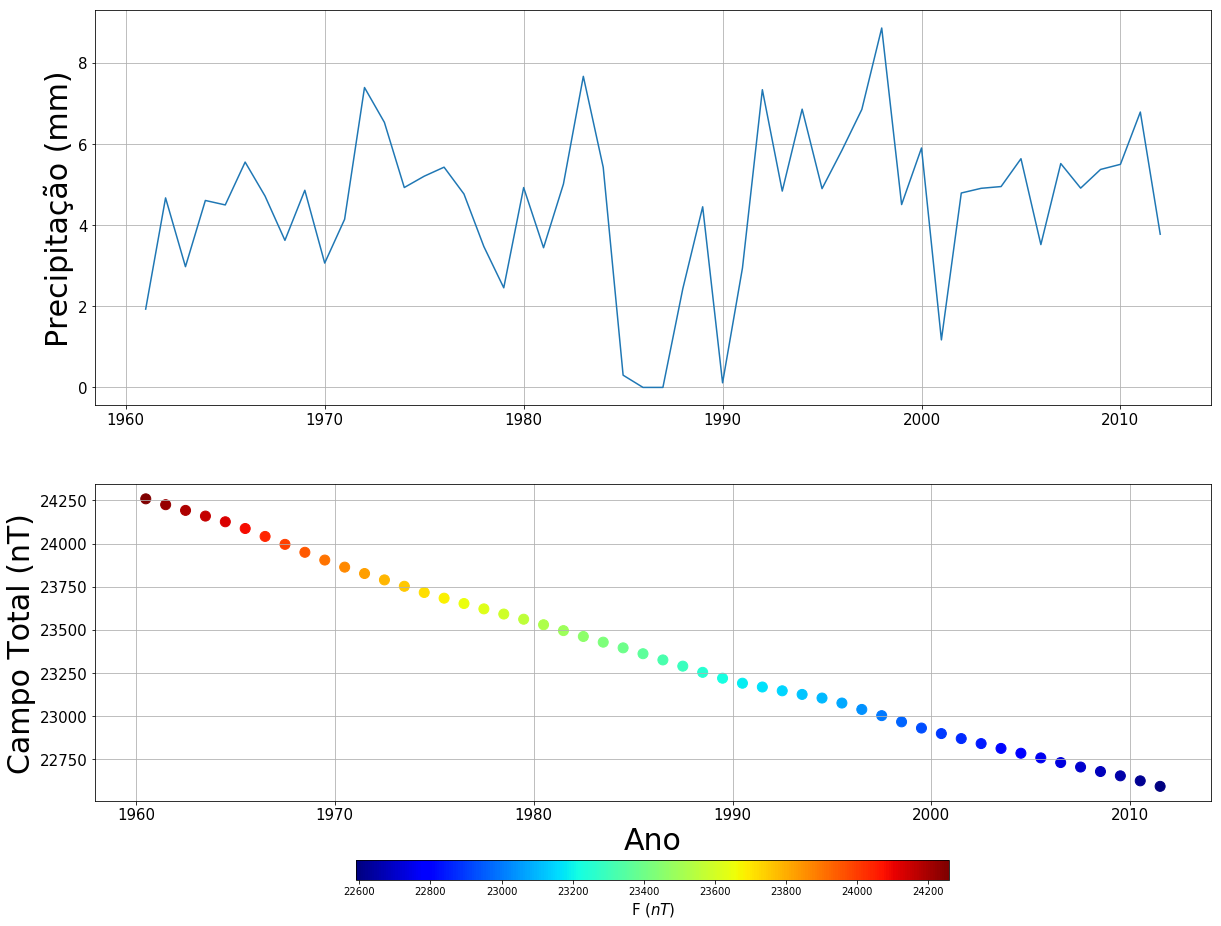

In [9]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data['DATE'],data['F'], c=data['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Campo Total.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [18]:
F_sem = data.F - y

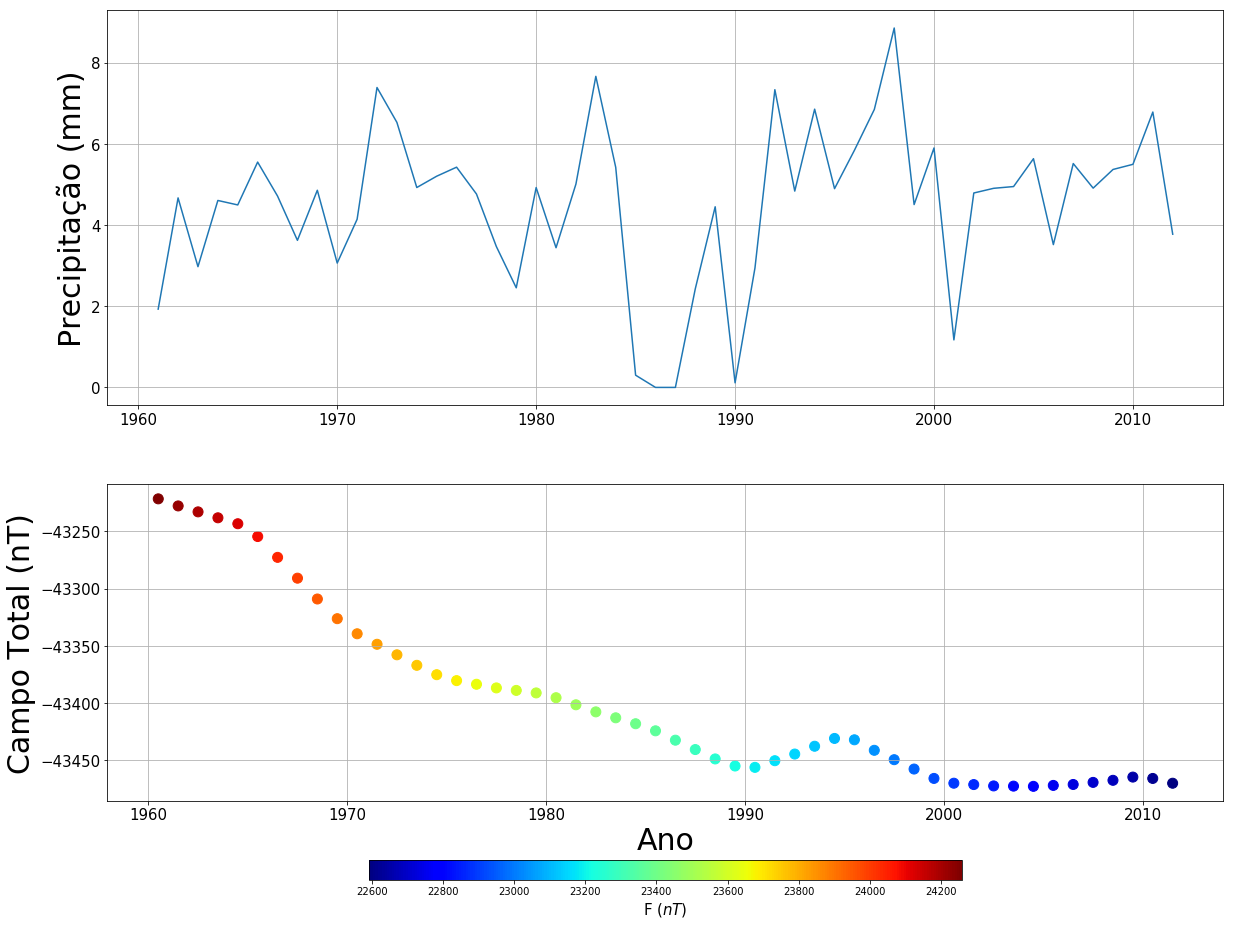

In [19]:
plt.figure(figsize=(20,16),facecolor = 'w')

plt.subplot(211)
p0 = plt.plot(irai['Ano'],irai['Media'])
#plt.xlabel('Ano', fontsize=30)
plt.ylabel('Precipitação (mm)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.subplot(212)
p2 = plt.scatter(data.DATE,F_sem, c=data['F'],cmap='jet',s = 100)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.05, orientation="horizontal")
cbar.set_label('F $(nT)$',fontsize=15,rotation = 0)
plt.xlabel('Ano', fontsize=30)
plt.ylabel('Campo Total (nT)', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

plt.savefig('Precipitação vs Campo Total.pdf', dpi=300, transparet=True, bbox_inches='tight')

plt.show()

In [21]:
pearsonr(irai.Media,F_sem)

(-0.079516784965476706, 0.57523845245974203)